# Basics of Optimization <a class="tocSkip">

<font size=1>

    Paolo Bonfini, 2025. All rights reserved.

This work is the intellectual property of `Paolo Bonfini`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

This notebook introduces to the concept of "**optimization**", in the sense of finding the best parameters of a function.

Notice that "optimization" is an <u>umbrella term</u>, which, depending on the _specific context_, can manifest as:

- **minimization**
- **maximization**
- **fitting**

In this notebook, we will focus on **function fitting**, but the concepts outlined here are <u>valid for optimization in general</u>.

> For the sake of this course, we can use the terms "_fit_" and "_optimize_" interchangeably

# What is [parametric] fitting

Easiest to start with a **linear** example.

Say we have some _observed_ data:

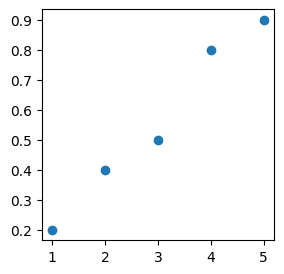

In [1]:
X = [1, 2, 3, 4, 5]
y = [0.2, 0.4, 0.5, 0.8, 0.9]

from matplotlib import pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(X, y)
plt.show()

... and we want a model that represents the true beahvior of the data.

> We may want to use it for:
> - **predicting** new data
> - **explain** the phenomenon that causes our observations

Let's assume a one-dimensional **linear model**, that is, a model of the type:

$$ y = \alpha{}x + \beta $$

where we call $\alpha$ and $\beta$ the model **parameters**.

By changing the parameters we obtain **different models**, e.g.:

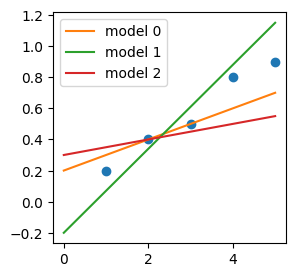

In [2]:
import numpy as np

def funct(xx, alpha, beta):
    return alpha*xx + beta

xx = np.linspace(0 ,5, 100)
'''Notice that `xx` is not the same as `X` (the data), but just 
an array of equally spaced values that we use for plotting purposes.'''

alphas = [0.1, 0.27, 0.05]
betas  = [0.2, -0.2, 0.3]

plt.figure(figsize=(3,3))

for i, (alpha, beta) in enumerate(zip(alphas, betas)):
    
    y_model_i = funct(xx, alpha, beta)
    plt.plot(xx, y_model_i, label='model %s' % i, c=str('C%s' % (i+1)))

plt.scatter(X, y)
plt.legend()
plt.show()

> It is convenient to think that each **parameter set** gives rise to a **different model**<br>
($\rightarrow$ _convenient for when we will talk about "model selection"_)

So the problem of picking the **best-fitting model** becomes $\rightarrow$ _How do I pick the best $\alpha$ and $\beta$?_

**Q:** First of all: what "**best**" means?

<div class="alert alert-danger" role="alert" style="border-radius: 8px; padding: 10px;">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ We need to define a <b>metric of fitness</b>!
   
</details>
</div>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

As a fitness metric, we could use the **error** that each model makes.  For each observed datum, the error is:

$$ err_{i} = y_i - \hat{y}_i$$

where $ \hat{y}_i$ is the model prediction for the corresponding $x_{i}$:

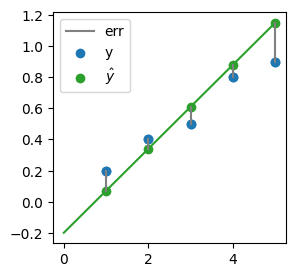

In [4]:
plt.figure(figsize=(3,3))
 
yhat_1 = funct(np.array(X), alphas[1], betas[1]) # model predictions (dots)
y_model_1 = funct(xx, alphas[1], betas[1]) # just for plotting the model (line)

plt.plot(xx, y_model_1, c='C2')
errs = plt.plot((X, X), (y, yhat_1), c='grey', label='err')
plt.setp(errs[1:], label="_")
plt.scatter(X, y, label='y', c='C0')
plt.scatter(X, yhat_1, label=r'$\hat{y}$', c='C2')

plt.scatter(X, y)
plt.legend()
plt.show()

$\rightarrow$ So what about picking the $\alpha$ and $\beta$ that minimize the errors?

It's easier if we use **single number** to minimize, so, we can consider the "sum of errors":

$$ \sum_i err_i = \sum_i (y_i - \hat{y}_i) $$

**Q:** But minimizing this has a problem. Can you guess?

<div class="alert alert-danger" role="alert" style="border-radius: 8px; padding: 10px;">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ For reasonable residuals, it averages to zero $\rightarrow$ Difficult to minimize!
   
</details>
</div>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

We consider the **sum of squares**:

$$ S = \sum_i err_i^2 = \sum_i (y_i - \hat{y}_i)^2 $$

and hence the **Least Squares Method**:

> The best-fitting parameters (=model) are those that <u>minimize the sum of squares of the errors</u>

<u>IMPORTANT:</u><br>
> The Least Squares method is only <u>one</u> possible optimization method.
>
> As we will see over and over again during this course, there are other **definitions** of "best fitting model" (e.g. _the one that minimizes the absolute error_), as well as countless **algorithms** to find such optimum.

Yet, LS is a very good example to start with, to get the general **intuition** behind otpimization.

# Fitting a line via Ordinary Least Squares (OLS)

The linear case offers the _simplest_ application of LS fitting, which goes under tha name of **Ordinary Least Squares (OLS)**.

Simple $\rightarrow$ We can solve this <u>analytically</u> (_no approximations, no iterations, computationally fast_).

## Problem definition

We first need to generalize to $p$ dimensions  $\rightarrow$ now, each $X_i$ for sample $i$ is not a single feature (as before), but an **array of features**: 

$$X_i = [x_0, x_1, x_2, ..., x_p]~~for~sample~i$$

So, if we have **$n$ samples**, each having **$p$ dimensions**, the data matrix is:

$$
\mathbf{X} =
\begin{bmatrix}
X_{11} & X_{12} & \cdots & X_{1p} \\
X_{21} & X_{22} & \cdots & X_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
X_{n1} & X_{n2} & \cdots & X_{np}
\end{bmatrix}
$$

However, the **target variable** is still one-dimensional:

$$
\pmb{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$


<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

Now, for the **model** $-$ In the 1D cases we said it was:

$$ y = \alpha{}x + \beta$$

Generalizing to $p$ dimensions, one could say that the **multi-dimensional model** should be of the form: 

$$ y = \beta_1{}x_{1} + \beta_2{}x_{2} + ... + \beta_p{}x_{p} + const$$

... where "_const_" plays the role of $\beta$ in the 1D case, and instead of using $\alpha$, $\beta$, $\gamma$, etc., we just use $\beta_1$, $\beta_2$, $\beta_3$, not to run out of Greek letters!

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

We can forget about the const with a small trick, without losing generalization (see [this wikipedia OLS article](https://en.wikipedia.org/wiki/Ordinary_least_squares)) $-$ so our **generalized multi-dimensional linear model** becomes:

$$ y = \beta_1{}x_{1} + \beta_2{}x_{2} + ... + \beta_p{}x_{p} $$

But, to be formally precise, we should add the index $i$, because this <u>must old true for _every_ data point $i$</u>:

$$ y_i = \beta_1{}x_{i, 1} + \beta_2{}x_{i, 2} + ... + \beta_p{}x_{i, p} $$

or, in _vector_ notation:

$$ y_i = \pmb{x_{i}}^T \pmb{\beta}$$

for each point $i$.  In _matrix notation_ we can represent the equations for all points in one go:

$$ \pmb{y} = \pmb{X} \pmb{\beta}$$

$$
\mathbf{X} =
\begin{bmatrix}
X_{11} & X_{12} & \cdots & X_{1p} \\
X_{21} & X_{22} & \cdots & X_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
X_{n1} & X_{n2} & \cdots & X_{np}
\end{bmatrix}, \quad
\pmb{\beta} =
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p
\end{bmatrix}, \quad
\pmb{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$


## Solution

The solution is obtained by:

1. **Writing the squares in a convenient form**

$$ S(\pmb{\beta}) = || \pmb{y} - \pmb{X} \pmb{\beta} ||^2$$

$$ = (\pmb{y} - \pmb{X\beta})^T(\pmb{y} - \pmb{X\beta})$$

$$ = \pmb{y}^T\pmb{y} - \pmb{y}^T\pmb{X}\pmb{\beta} - \pmb{\beta}^T\pmb{X}^T\pmb{y} + \pmb{\beta}^T\pmb{X}^T\pmb{X}\pmb{\beta} $$

2. **Finding the minimizer by searching where the derivative of $S(\pmb{\beta})$ equals 0**

$$ 0 = \frac{\partial S(\pmb{\beta})}{\partial \pmb{\beta}} $$

> <u>IMPORTANT</u>: We want to minimize $S(\pmb{\beta})$ with respect to $\pmb{\beta}$, <u>not</u> $\pmb{X}$ !<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; $\rightarrow$ _i.e., we are looking for the best parameter set $\hat{\pmb{\beta}}$ that minimizes the squared errors:_
>
> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; $\pmb{\beta} = \operatorname{argmin_\beta} S(\pmb{\beta})$

$$ 0 = \frac{\partial S(\pmb{\beta})}{\partial \pmb{\beta}} $$

$$
= \frac{\partial 
    ( \pmb{y}^T\pmb{y} - \pmb{y}^T\pmb{X}\pmb{\beta} - \pmb{\beta}^T\pmb{X}^T\pmb{y}
    +\pmb{\beta}^T\pmb{X}^T\pmb{X}\pmb{\beta} )
   }{
    \partial \pmb{\beta}
   } 
$$

$$ = -2\pmb{X}^T\pmb{y} + 2\pmb{X}^T\pmb{X}\pmb{\beta} $$

simplifying, and moving terms around it follows:

$$ \pmb{X}^T\pmb{y} =  \pmb{X}^T\pmb{X}\pmb{\beta} $$

\begin{equation}
    \pmb{\hat{\beta}} = (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^T\pmb{y} \tag{Eq. 1}
\end{equation}

><u>Extremely simple</u>
>
><u>But is it computationlly fast?</u><br>  Inverting a matrix (in our case, ($\pmb{X}^T\pmb{X})^{-1}$) is a "heavy lifting" job for a computer.<br>
> $\rightarrow$ _complexity: $\mathcal{O}(n^3)$_



## In python

We will use [`numpy.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) to fit:

$$ y = \beta_2{}x + \beta_1 $$

to the data seen above (notice that now we call every parameter as "$\beta_{<number>}$", as for the generic multi-dimensional case).

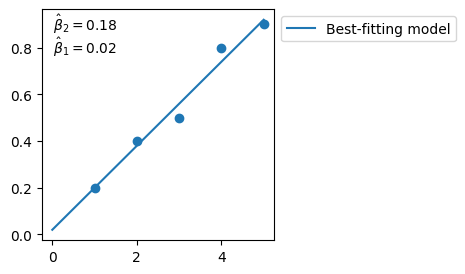

In [5]:
# Same data as above:
X = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.4, 0.5, 0.8, 0.9])

from numpy.linalg import lstsq

X_prime = np.vstack([X, np.ones(len(X))]).T
'''
What is this line doing?! Adding a row of `1`s to our data?! Why?

Remember, above, when we said that we can "hide" the constant in:
    y = beta*X + const
using a trick?

The trick it is to create a "fake", additional feature in X, and fill it
with ones.  This will play the role of the constant.

See the links above, as well as the `np.linalg.lstsq` documentation, here:
    https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
''';

beta_2_hat, beta_1_hat = np.linalg.lstsq(X_prime, y, rcond=None)[0]
# best-fitting parameters

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1)
plt.scatter(X, y)
plt.plot(xx, beta_2_hat*xx + beta_1_hat, 'C0', label='Best-fitting model')
plt.text(.05, .99, '$\\hat{\\beta}_2 = %.2f$' % beta_2_hat, ha='left', va='top', transform=ax.transAxes)
plt.text(.05, .89, '$\\hat{\\beta}_1 = %.2f$' % beta_1_hat, ha='left', va='top', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## In python - an easier library

Ok, `numpy.linalg.lstsq` is very educational because it solves the OLS problem **algebraically**, just like but in Equation 1.<br>
But $-$ as you have seen $-$ it has a clumsy usage.

For practical purposes, we will now on use the much more **intuitive** and **flexible** [`lmfit`](https://lmfit.github.io/lmfit-py/).

> _NOTE: Internally, it uses by default a different algorithm to solve the least-squares problem (see later: "Levemberg-Marquardt"), but we pretend not, for now._

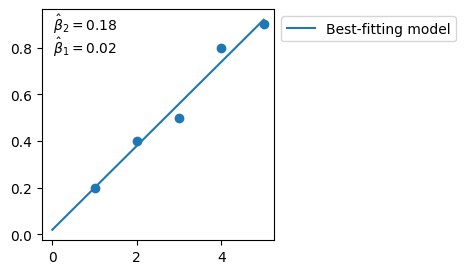

In [11]:
from lmfit import Model

def model_func(x, beta_1, beta_2):
    y = beta_2*x + beta_1
    return y

# Create an lmfit `Model` object:
model = Model(model_func)

# Invoking the `fit()` method, which returns the object `result`:
result = model.fit(y, x=X, beta_1=0, beta_2=1)
'''
Notice that here we are providing some initial guess for `beta_1` and `beta_2`,
this is only because this library is using the Levemberg-Marquardt algorithm.

In reality OLS doesn't need initial guesses when using the algebraic solution,
as demonstrated above by using `np.linalg.lstsq`, which properly solves OLS.

We will see later why Levemberg-Marquardt requires initial guesses.
'''

# Retrieving best-fit parameters:
beta_1_hat = result.params['beta_1'].value
beta_2_hat = result.params['beta_2'].value

xx = np.linspace(0 , np.max(X), 100)
'''Notice that `xx` is not the same as `X` (the data), but just 
an array of equally spaced values that we use for plotting purposes.'''

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1)
plt.scatter(X, y)
plt.plot(xx, beta_2_hat*xx + beta_1_hat, 'C0', label='Best-fitting model')
plt.text(.05, .99, '$\\hat{\\beta}_2 = %.2f$' % beta_2_hat, ha='left', va='top', transform=ax.transAxes)
plt.text(.05, .89, '$\\hat{\\beta}_1 = %.2f$' % beta_1_hat, ha='left', va='top', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<div style="border-left: 5px solid #FFA500; background-color: rgba(255, 165, 0, 0.15); padding: 10px; border-radius: 4px; color: inherit;">

<font size=6>**Exercise [30 min]**</font>

**Objective:** Evaluate the best-fit model to some data. You will have to assume a model, and then run the Least-Squares minimization on the provided data. 

<u>The final goal is to observe what happens when you apply the model to new, "_test_" data.</u>
<br>

**Dataset:** The following one.
</div>    

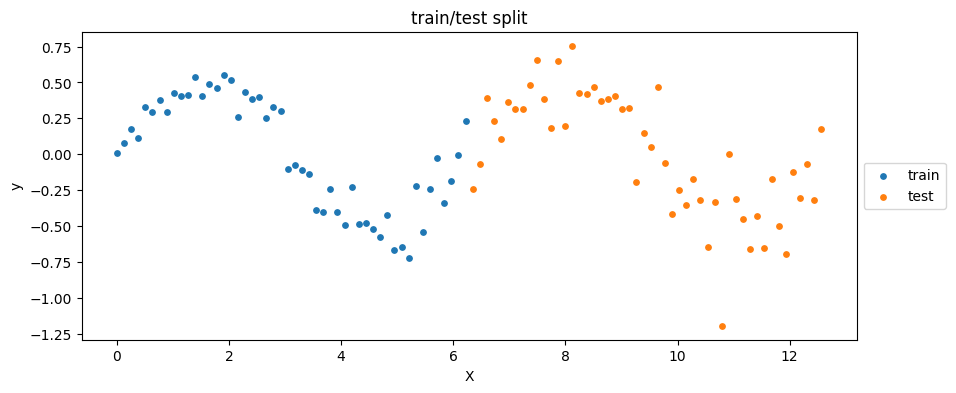

In [9]:
# Loading and plotting data:
import tarfile
import io
from matplotlib import pyplot as plt
import numpy as np

tar = tarfile.open("data/C02_data_ex1.tar.gz", "r:gz")

def convert_and_load(file):
    with io.BytesIO(file.read()) as f:
        return np.load(f)

for member in tar.getmembers():
    file = tar.extractfile(member)
    if member.name == 'X_train.npy': X_train = convert_and_load(file)
    if member.name == 'y_train.npy': y_train = convert_and_load(file)
    if member.name == 'X_test.npy':  X_test  = convert_and_load(file)
    if member.name == 'y_test.npy':  y_test  = convert_and_load(file)

plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, label='train', c='C0', s=15)
plt.scatter(X_test,  y_test,  label='test',  c='C1', s=15)
plt.xlabel('X')
plt.ylabel('y')
plt.title('train/test split')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

<div style="border-left: 5px solid #FFA500; background-color: rgba(255, 165, 0, 0.15); padding: 10px; border-radius: 4px; color: inherit;">

**Task:**  In particular, you will have to:
1. Look at the data and assume a model
2. Use only the "_train_" data to perform the LS minimization to find the best model
3. Using the best model, calculate and plot the model predictions on the "_train_" data
4. Calculate and plot the model predictions on the "_test_" data
5. Calculate the squares of errors for the "_train_" ($S_{train}$) and "_test_" ($S_{test}$) data
6. Now compare the two squares of errors $\rightarrow$ _What do you notice?_

**Hints:**
- _For task 4_ $-$ To get the squares of errors you can simply calculate:
$$ S_{train} = \sum_i (y_i - \hat{y}_i)^2 ~~~~~ \forall i \in train$$

$$ S_{test} = \sum_i (y_i - \hat{y}_i)^2 ~~~~~ \forall i \in test$$

&emsp;&ensp; Notice that $-$ once the model has been fit $-$ $S_{train}$ is effectively the minimized Least Squares.<br>
&emsp;&ensp; But what about $ S_{test} $? 
    
</div>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

_Our solution_

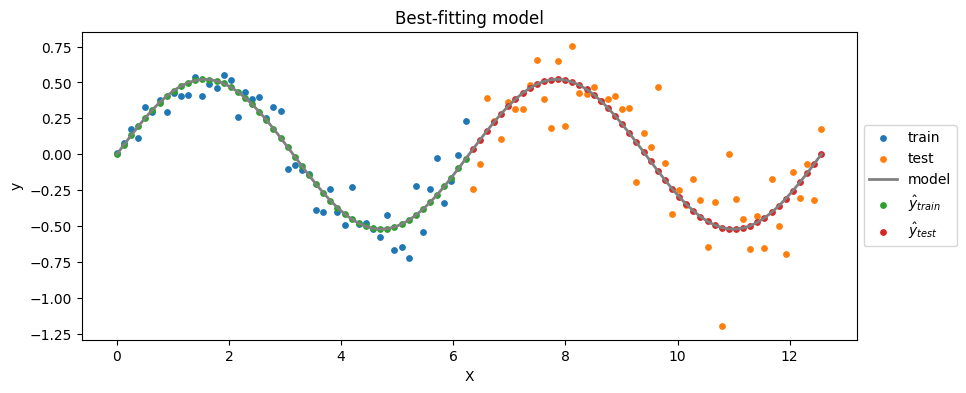

In [12]:
from lmfit import Model

# 1. Assuming a sinusoidal model
def model_func(x, beta_1):
    y = beta_1*np.sin(x)
    return y

# 2. Using only the "_train_" data to perform the LS minimization

# Create an lmfit `Model` object:
model = Model(model_func)

# Invoking the `fit()` method, which returns the object `result`:
result = model.fit(y_train, x=X_train, beta_1=0)

# Retrieving best-fit parameters:
beta_1_hat = result.params['beta_1'].value

# 3. Calculating and plotting the model predictions on the "_train_" data
# 4. Calculating and plotting the model predictions on the "_test_" data
# Predictions of the model for train/test:
yhat_train = model_func(X_train, beta_1_hat)
yhat_test  = model_func(X_test,  beta_1_hat)

xx = np.linspace(0 ,np.max(X_test), 100)
'''Notice that `xx` is not the same as `X` (the data), but just 
an array of equally spaced values that we use for plotting purposes.'''

plt.figure(figsize=(10, 4))
# Data:
plt.scatter(X_train, y_train, label='train', c='C0', s=15)
plt.scatter(X_test,  y_test,  label='test',  c='C1', s=15)
# Model:
plt.plot(xx, model_func(xx, beta_1_hat), label='model', c='grey', lw=2)
# Train predictions:
plt.scatter(X_train, yhat_train, label='$\hat{y}_{train}$', c='C2', s=15)
# Test predictions:
plt.scatter(X_test,  yhat_test,  label='$\hat{y}_{test}$',  c='C3', s=15)
#
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best-fitting model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

In [14]:
# 5. Calculating squares of errors for the "_train_" and "_test_":
S_train = np.sum( (yhat_train - y_train)**2 )
S_test  = np.sum( (yhat_test - y_test)**2 )

# 6. Now comparing the two squares:
print("S_train: %.2f | S_test: %.2f" % (S_train, S_test))

S_train: 0.68 | S_test: 2.43


## Overfitting

What if $S_{test}$ <u>is way larger than</u> $S_{train}$ ? $\rightarrow$ **overfitting**

This is to be expected because the model has been trained on $X_{train}$, and, as you can see, $X_{test}$ shows larger variance.

**Q:** What could we do to obtain a more **balanced model** (i.e., a model with similar _performance_ on train and test data)?

<div class="alert alert-danger" role="alert" style="border-radius: 8px; padding: 10px;">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ <b>Shuffle</b> the data!
    
</details>
</div>

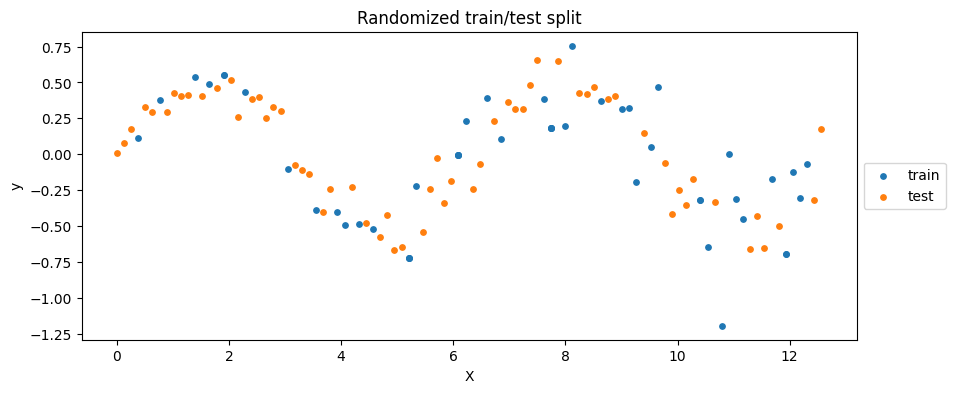

In [17]:
'''Merging train and test data, first.'''
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

'''
Now performing a random split of the merged data.
Re-running this block will generate a new, randomized split.
'''
idxs_train_ = np.random.choice(np.arange((len(X))), size=len(X_train))
# ^here we pick at random some train indexes from the merged `X` 
idxs_test_ = list(set(np.arange((len(X)))) - set(idxs_train_))
# ^here we pick the complementary indexes

X_train_ = X[idxs_train_]
y_train_ = y[idxs_train_]
X_test_ = X[idxs_test_]
y_test_ = y[idxs_test_]

plt.figure(figsize=(10, 4))
plt.scatter(X_train_, y_train_, label='train', c='C0', s=15)
plt.scatter(X_test_,  y_test_,  label='test',  c='C1', s=15)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Randomized train/test split')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

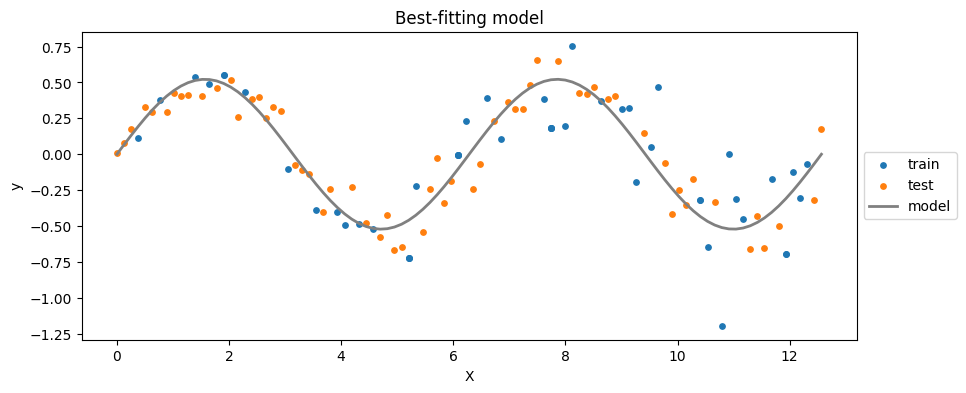

S_train: 2.84 | S_test: 0.93


In [18]:
'''Re-running the same fit as above on the new, randomized split.'''
from lmfit import Model

def model_func(x, beta_1):
    y = beta_1*np.sin(x)
    return y

model = Model(model_func)

result = model.fit(y_train, x=X_train, beta_1=0)

beta_1_hat = result.params['beta_1'].value

yhat_train_ = model_func(X_train_, beta_1_hat)
yhat_test_  = model_func(X_test_,  beta_1_hat)

xx = np.linspace(0 ,np.max(X), 100)

plt.figure(figsize=(10, 4))
plt.scatter(X_train_, y_train_, label='train', c='C0', s=15)
plt.scatter(X_test_,  y_test_,  label='test',  c='C1', s=15)
plt.plot(xx, model_func(xx, beta_1_hat), label='model', c='grey', lw=2)
#
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best-fitting model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

S_train = np.sum( (yhat_train_ - y_train_)**2 )
S_test  = np.sum( (yhat_test_ - y_test_)**2 )
print("S_train: %.2f | S_test: %.2f" % (S_train, S_test))

# Non-linear least squares: Levemberg-Marquardt algorithm

We saw **linear** problems, i.e. when the model is **linear in the parameters**, e.g.:

$$ y = \beta_2 x + \beta_1 ~~~~~or~~~~~ y = \beta_1 sin(x) $$

What about the **non-linear** problems, i.e. when the model is **<u>not</u> linear in the parameters**, e.g.:

$$ y = \beta_1e^{\beta_2 x} ~~~~~or~~~~~ y = sin(\beta_1 x) ~~~~?$$

In general, LS not solvable algebraically $\rightarrow$ Need to <u>converge to the solution</u>!

## Brute-force approach (spoiler: doesn't work!)

> <u>Objective:</u> The taks is $-$ as usual $-$ to find the parameter set $\hat{\pmb{\beta}}$ that **minimizes the sum of squares** $S(\pmb{\beta})$.

So, let's say that we have a model of the type:

$$ y = \beta_1e^{\beta_2 x} $$

and we want to find $\hat{\pmb{\beta}} = (\hat{\beta_1}, \hat{\beta_2})$ that minimizes $S(\beta_1, \beta_2)$.

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

Let's **assume** we could potentially explore _all possible_ parameter combinations.

For each given $(\bar{\beta}_1, \bar{\beta_2})$ set, we:
- Create a the corresponding model: $\bar{y}_{pred} = \bar{\beta}_1e^{\bar{\beta}_2 x} $
- Calculate $S(\bar{\beta}_1, \bar{\beta}_2) = \sum_i^{n}(\bar{y}_{i, pred} - y_{i, obs})^2$

... and repeat _ad infinitum_.

$\rightarrow$ Then, we could hypothetically map the _whole_ $S(\beta_1, \beta_2)$ space:

<img src="images/S.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">

> Except that this <u>will take forever</u>!

## Iterative approach (now we are talking!)

Instead, we may want to **converge** to the best solution $\hat{\pmb{\beta}} = (\hat{\beta_1}, \hat{\beta_2})$.<br>
(_possibly in a fast way_)

> We will accept a compromise: **approximate solution**.

1. We start from a **blank state**:

<img src="images/S_blank.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">


2. Or, better, from an **initial guess** $(\beta^A_1, \beta^A_2)$:<br>
(_We look at the function, we had an enlightment, we used chat codes, etc._)

<img src="images/LM_1st_guess.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">

_NOTE: Here we conveniently show the neighborhood around the point we pick._

**Q:** Where to take the <u>next guess</u>? 

<div class="alert alert-danger" role="alert" style="border-radius: 8px; padding: 10px;">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
What about looking at the <b>gradient</b> (i.e., <b>derivative</b>) around that point $\rightarrow$ it points towards where the $S(\beta_1, \beta_2)$ is decreasing.
    
<img src="images/LM_1st_gradient.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">

Let's follow the white rabbit and see where it leads us ...
    
</details>
</div>

3. We take the **next guess**  $(\beta^B_1, \beta^B_2)$ _somewhere along the gradient_:

<img src="images/LM_2nd_guess.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">

> Not bad! It lead us to a lower $S(\beta_1, \beta_2)$.  Let's try again ...

4. We take **another guess** _somewhere along the gradient_:

<img src="images/LM_3rd_guess.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">

5. And again, and again .. **until we are happy** (_define happy_)

<img src="images/LM_4th_guess.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">

## Enough with the crayons - now, math!

Let's call: $\hat{y}_i := f(x_i, \pmb{\beta})$ $\leftarrow$ model value for $x_i$

- The initial guess for the best-fit parameters is $\pmb{\bar{\beta}}$.

- The next guess is: $\pmb{\bar{\beta}} \rightarrow \pmb{\bar{\beta}} + \pmb{\delta}$, where $\pmb{\delta}$ is the small amount we move.

<u>**Objective:**</u> Update $\pmb{\bar{\beta}}$ until we minimized $S(\pmb{\beta})$

We can use the Taylor expansion to approximate $f(x_i, \pmb{\bar{\beta}})$ around $\pmb{\bar{\beta}}$:

$$ f(x_i, \pmb{\bar{\beta}} + \pmb{\delta}) \approx f(x_i, \pmb{\bar{\beta}}) + {\partial f(x_i, \pmb{\beta}) \over \partial\pmb{\beta}} \pmb{\delta} $$

<u>IMPORTANT:</u> Notice that **the derivative is on the parameters** ($\pmb{\beta}$), <u>not</u> the data ($x_i$)! $\rightarrow$ We want to explore the _neighborhood_ of $\pmb{\bar{\beta}}$!

We can define $\pmb{J_i} := {\partial f(x_i, \pmb{\beta}) \over \partial\pmb{\beta}} $, so:

$$
\begin{equation}
 f(x_i, \pmb{\bar{\beta}} + \pmb{\delta}) \approx f(x_i, \pmb{\bar{\beta}}) + \pmb{J_i}\pmb{\delta}  \tag{Eq. 2}
\end{equation}
$$

<u>**Algorithm:**</u>

We now need to define how much to move, to find the next gues $\rightarrow$ $\pmb{\delta} = ?$

We will find it by solving the usual problem $\rightarrow$ **minimize the sum of squares**.

If the next guess $\pmb{\bar{\beta}} + \pmb{\delta}$ corresponds to a true minimum, then $S(\pmb{\bar{\beta}} + \pmb{\delta})$ must have derivative = 0 (w/r to vector $\pmb{\delta}$):

$$ {\partial S(\pmb{\bar{\beta}} + \pmb{\delta}) \over \partial\pmb{\delta}} = 0 $$

> _Meaning: moving away from $\pmb{\bar{\beta}} + \pmb{\delta}$ causes a worse result._

Let's solve it, starting from the approximation of _Equation 2_:

$$
\begin{align}
 S(\pmb{\bar{\beta}} + \pmb{\delta}) = & \sum_{i}^n [y_i - f(x_i, \pmb{\bar{\beta}} + \pmb{\delta})]^2\\
 \approx & \sum_{i}^n [y_i - f(x_i, \pmb{\bar{\beta}}) - \pmb{J_i}\pmb{\delta}]^2\\
\end{align}
$$

Which $-$ in vector notation $-$ becomes:

$$
\begin{align}
 S(\pmb{\bar{\beta}} + \pmb{\delta}) \approx & ~||\pmb{y} - \pmb{f(\bar{\beta})} - \pmb{J}\pmb{\delta}||^2\\
 = & ~[\pmb{y} - \pmb{f(\bar{\beta})} - \pmb{J}\pmb{\delta}]^T[\pmb{y} - \pmb{f(\bar{\beta})} - \pmb{J}\pmb{\delta}]\\
 = & ~[\pmb{y} - \pmb{f(\bar{\beta})}]^T[\pmb{y} - \pmb{f(\bar{\beta})}] - [\pmb{y} - \pmb{f(\bar{\beta})}]^T\pmb{J}\pmb{\delta} - (\pmb{J}\pmb{\delta})^T[\pmb{y} - \pmb{f(\bar{\beta})}] + \pmb{\delta}^T\pmb{J}^T\pmb{J}\pmb{\delta}\\
 = & ~[\pmb{y} - \pmb{f(\bar{\beta})}]^T[\pmb{y} - \pmb{f(\bar{\beta})}] - 2[\pmb{y} - \pmb{f(\bar{\beta})}]^T\pmb{J}\pmb{\delta} + \pmb{\delta}^T\pmb{J}^T\pmb{J}\pmb{\delta}\\
\end{align}
$$

Now we take the derivative w/r to vector $\pmb{\delta}$ ([_this tables will help to follow the calculations_](https://en.wikipedia.org/wiki/Matrix_calculus)):

$$
\begin{align}
0 = & ~{\partial S(\pmb{\bar{\beta}} + \pmb{\delta}) \over \partial\pmb{\delta}}\\
= &~ - 2[\pmb{y} - \pmb{J}^T\pmb{f(\bar{\beta})}] + 2\pmb{J}^T\pmb{J}\pmb{\delta}\\
\end{align}
$$

.. and finally:

$$
\begin{equation}
 \big(\pmb{J}^T\pmb{J}\big)\pmb{\delta} = \pmb{J}^T[\pmb{y} - \pmb{f(\bar{\beta})}] \tag{Eq. 3}
\end{equation}
$$

$\rightarrow$ set of $p$ linear equations ($p$ = number of parameters) that **can be solved for** $\pmb{\delta}$ !

> To get to a better minimum, we can just **repeat the procedure** by replacing the starting point: $\pmb{\bar{\beta}^{\prime}} = \pmb{\bar{\beta}} + \pmb{\delta}$, move to $\pmb{\bar{\beta}^{\prime}} + \pmb{\delta}^{\prime}$, etc. <br>
> ... until we are happy.

## Actual Levemberg & Marquardt algorithms

- Equation 3 is known as **Gauss-Newton** method (1700-1800 _ca._)

- The **Levemberg** modification (1944) is:

$$
\begin{equation}
 \big(\pmb{J}^T\pmb{J} + \lambda \pmb{I}\big)\pmb{\delta} = \pmb{J}^T[\pmb{y} - \pmb{f(\bar{\beta})}] \tag{Eq. 4}
\end{equation}
$$

$\lambda$ $\rightarrow$ damping factor

> Helps for **faster convergence** and **larger accuracy** in finding the minimum

Adjusted at each iteration:
- if $S(\pmb{\beta})$ decreases rapidly $\rightarrow$ $\lambda$ is decreased (_deceleration_)
- if $S(\pmb{\beta})$ doesn't decrease enough $\rightarrow$ $\lambda$ is increased (_push_)

## Further reads

- **Marquardt** contribution $\rightarrow$ [wikipedia article on Levemberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)
- **Stopping** criteria $\rightarrow$ [wikipedia article on Levemberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)
- **Shortcomings** of L-M $\rightarrow$ [this blog](https://python4mpia.github.io/fitting_data/least-squares-fitting.html)

# Chi-square (χ2) fitting

> Basically, it's **least squares for when data have errors on y**

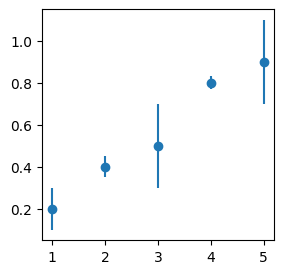

In [19]:
X = [1, 2, 3, 4, 5]
y = [0.2, 0.4, 0.5, 0.8, 0.9]
y_err= [0.1, 0.05, 0.2, 0.03, 0.2]

from matplotlib import pyplot as plt
plt.figure(figsize=(3,3))
plt.errorbar(X, y, yerr=y_err, marker="o", ls="none")
plt.show()

Instead of minimizing the sum of squares $S(\pmb{\beta})$, we minimize the **weighted average of the sum of squares** $\chi^2$:

$$
\chi^2 = \sum_i {(y_i - \hat{y_i})^2 \over \sigma_i^2}
$$

... where the weigths are the **measurement uncertainties** $\sigma_i$.

## Further reads

- Why do we use the "**reduced**" $\chi^2$ to compare model results (i.e., $\chi_{\nu}^2$)? $\rightarrow$ [Andrae et al. 2010](https://arxiv.org/pdf/1012.3754.pdf)


# Stochastic Gradient Descent - teaser

> **Gradient descent** is just one of the alternatives to L-M to **minimize $S(\pmb{\beta})$**

The update of the parameters goes as:

$$
\begin{equation}
 \pmb{\beta}^\prime \rightarrow \pmb{\beta} - \eta \nabla S(\pmb{\beta}) \tag{Eq. 5}
\end{equation}
$$

where $\nabla$ is the gradient of $S(\pmb{\beta})$.

> Meaning: **descend** along the **gradient** by a multiplicative factor $\eta$

For comparison $\rightarrow$ In Levemberg's algorithm (_Equation 4_), the factor $\lambda$ was additive.

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

The gradient becomes **stochastic** when the update of Equation 5 is done **sample by sample**:

<img src="images/SGD.png" width=400 style="display:block; margin-left:auto; margin-right:auto;">

$\rightarrow$ _More on Gradient Descent in the Deep Learning chapter!_